<a href="https://colab.research.google.com/github/Kittitat-13amrung/AJ-CA2/blob/main/Kittitat_Bamrung_CA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount google drive on colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# upload kaggle.json to gdrive
from google.colab import files
files.upload()

In [ ]:
# create .kaggle folder
%mkdir ~/.kaggle/

# copy API credential into .kaggle folder
%cp ./kaggle.json ~/.kaggle/

In [ ]:
# hide credential
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# download dataset
! kaggle datasets download misrakahmed/vegetable-image-dataset
# unzip dataset
!unzip vegetable-image-dataset
# remove zip file
!rm -r vegetable-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [ ]:
import tensorflow as tf
from keras.utils import image_dataset_from_directory

# default image width/height
img_height = 224
img_width = 224
batch_size = 32
validation_split = 0.3
dataset_dir = '/content/Vegetable Images/'

# split img dataset into train and validation sets
train_ds = image_dataset_from_directory(
    dataset_dir + 'train',
    validation_split=validation_split,
    subset="training",
    seed=1337,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

val_ds = image_dataset_from_directory(
    dataset_dir + 'validation',
    validation_split=validation_split,
    subset="validation",
    seed=1337,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

test_ds = image_dataset_from_directory(
    dataset_dir + 'test',
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 15000 files belonging to 15 classes.
Using 10500 files for training.
Found 3000 files belonging to 15 classes.
Using 900 files for validation.
Found 3000 files belonging to 15 classes.


In [ ]:
# get all label names from dataset
class_names = train_ds.class_names
class_names

# get the lenght of the labels
num_classes = len(class_names)
num_classes

15

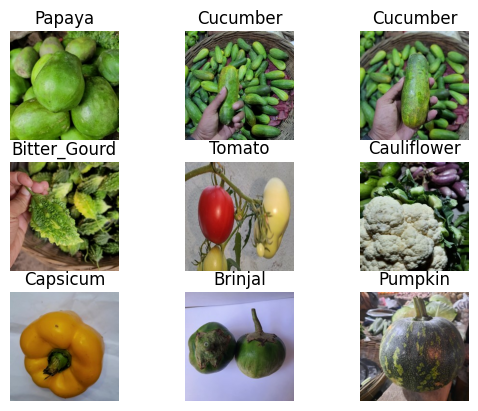

In [ ]:
import matplotlib.pyplot as plt

# plotting an image from each music genre
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

# prefetch dataset ahead of time to reduce fitting time
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# creating a baseline model
baseline = tf.keras.Sequential([
    tf.keras.layers.Conv2D(20, 3, activation='relu', input_shape=(img_height, img_width, 3)),

    tf.keras.layers.Conv2D(20, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(50, 3, activation='relu'),

    tf.keras.layers.Conv2D(50, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# compile baseline
baseline.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# summary of the baseline's architecture
baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 20)      560       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 20)      3620      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 20)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 50)      9050      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 50)      22550     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 50)        0         
 g2D)                                                   

In [ ]:
baseline.fit(train_ds, validation_data=val_ds, epochs=100)
# took about nearly an hour to fit the model

Epoch 1/100
329/329 [==============================] - 22s 67ms/step - loss: 0.0251 - accuracy: 0.9952 - val_loss: 10.3524 - val_accuracy: 0.6278
Epoch 2/100
329/329 [==============================] - 22s 67ms/step - loss: 0.1542 - accuracy: 0.9870 - val_loss: 12.2001 - val_accuracy: 0.5111
Epoch 3/100
329/329 [==============================] - 22s 65ms/step - loss: 0.1866 - accuracy: 0.9727 - val_loss: 8.4493 - val_accuracy: 0.6133
Epoch 4/100
329/329 [==============================] - 22s 68ms/step - loss: 0.0518 - accuracy: 0.9914 - val_loss: 9.7751 - val_accuracy: 0.6022
Epoch 5/100
329/329 [==============================] - 22s 66ms/step - loss: 0.0097 - accuracy: 0.9981 - val_loss: 10.0079 - val_accuracy: 0.6356
Epoch 6/100
329/329 [==============================] - 21s 65ms/step - loss: 0.0200 - accuracy: 0.9972 - val_loss: 10.8333 - val_accuracy: 0.6022
Epoch 7/100
329/329 [==============================] - 22s 67ms/step - loss: 0.0306 - accuracy: 0.9976 - val_loss: 11.1132 - v

In [ ]:
# second model with rescaling of each image
model_1 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    tf.keras.layers.Conv2D(20, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(50, 3, activation='relu'),
    tf.keras.layers.Conv2D(50, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# save best model to folder
checkpoint_path = 'model/model_2'

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    verbose=1,
    save_weights_only=False,
    save_freq='epoch',
    save_best_only=True
)

model_1.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[checkpoint_cb])

# took about 35 mins

Epoch 1/100
329/329 [==============================] - ETA: 0s - loss: 1.0784 - accuracy: 0.6569
Epoch 1: val_accuracy improved from -inf to 0.81778, saving model to model/cp.ckpt
329/329 [==============================] - 18s 50ms/step - loss: 1.0784 - accuracy: 0.6569 - val_loss: 0.5861 - val_accuracy: 0.8178
Epoch 2/100
329/329 [==============================] - ETA: 0s - loss: 0.3950 - accuracy: 0.8763
Epoch 2: val_accuracy improved from 0.81778 to 0.85667, saving model to model/cp.ckpt
329/329 [==============================] - 16s 48ms/step - loss: 0.3950 - accuracy: 0.8763 - val_loss: 0.4319 - val_accuracy: 0.8567
Epoch 3/100
328/329 [============================>.] - ETA: 0s - loss: 0.1642 - accuracy: 0.9500
Epoch 3: val_accuracy improved from 0.85667 to 0.89222, saving model to model/cp.ckpt
329/329 [==============================] - 16s 48ms/step - loss: 0.1641 - accuracy: 0.9500 - val_loss: 0.4359 - val_accuracy: 0.8922
Epoch 4/100
329/329 [==============================] - 

In [ ]:
# load model from previous computation
model_2 = tf.keras.models.load_model('model/model_2')

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 222, 222, 20)      560       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 20)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 50)      9050      
                                                                 
 conv2d_9 (Conv2D)           (None, 107, 107, 50)      22550     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 53, 53, 50)        0         
 g2D)                                                 

In [ ]:
# print out the evaluation of the model
loss, acc = model_2.evaluate(test_ds, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

# accuracy
print(model_2.predict(test_ds).shape)

94/94 - 8s - loss: 0.7252 - accuracy: 0.9090 - 8s/epoch - 84ms/step
Restored model, accuracy: 90.90%
94/94 [==============================] - 2s 16ms/step
(3000, 15)


In [ ]:
# data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

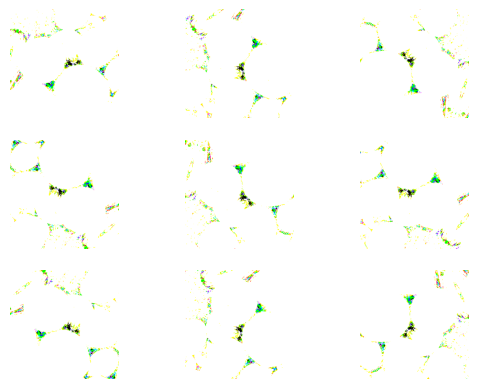

In [ ]:
# plotting an image with augmentation
image, label = next(iter(train_ds))

for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [ ]:
# model 3 with rescaling and data augmentation to add extra features and images to dataset
model_3 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    data_augmentation,

    tf.keras.layers.Conv2D(20, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(50, 3, activation='relu'),
    tf.keras.layers.Conv2D(50, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint_path = 'model/model_3'

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    verbose=1,
    save_weights_only=False,
    save_freq='epoch',
    save_best_only=True
)

model_3.fit(train_ds, validation_data=val_ds, epochs=40, callbacks=[checkpoint_cb])



Epoch 1/40
329/329 [==============================] - ETA: 0s - loss: 1.4922 - accuracy: 0.4982
Epoch 1: val_accuracy improved from -inf to 0.68889, saving model to model/model_3
329/329 [==============================] - 23s 54ms/step - loss: 1.4922 - accuracy: 0.4982 - val_loss: 0.9180 - val_accuracy: 0.6889
Epoch 2/40
328/329 [============================>.] - ETA: 0s - loss: 0.8505 - accuracy: 0.7198
Epoch 2: val_accuracy improved from 0.68889 to 0.72778, saving model to model/model_3
329/329 [==============================] - 17s 51ms/step - loss: 0.8504 - accuracy: 0.7198 - val_loss: 0.7632 - val_accuracy: 0.7278
Epoch 3/40
328/329 [============================>.] - ETA: 0s - loss: 0.6710 - accuracy: 0.7797
Epoch 3: val_accuracy improved from 0.72778 to 0.79222, saving model to model/model_3
329/329 [==============================] - 17s 50ms/step - loss: 0.6714 - accuracy: 0.7795 - val_loss: 0.5953 - val_accuracy: 0.7922
Epoch 4/40
329/329 [==============================] - ETA:

In [ ]:
# used the best model from previous training to predict test data
model_4 = tf.keras.models.load_model('model/model_3')

loss, acc = model_4.evaluate(test_ds, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(model_4.predict(test_ds).shape)

94/94 - 5s - loss: 0.1748 - accuracy: 0.9577 - 5s/epoch - 48ms/step
Restored model, accuracy: 95.77%
94/94 [==============================] - 1s 14ms/step
(3000, 15)


In [ ]:
# store predictions from model 4
model_4_y_pred = model_4.predict(test_ds)

# convert predicted array into a label class
predicted_categories = tf.argmax(model_4_y_pred, axis=1)

94/94 [==============================] - 2s 17ms/step


In [ ]:
# store the true labels
true_categories = tf.concat([y for x, y in test_ds], axis=0)

In [ ]:
from sklearn.metrics import confusion_matrix

# plotting the confusion matrix
confusion_matrix(predicted_categories, true_categories)

array([[190,   1,   1,   1,   0,   0,   0,   0,   4,   1,   0,   0,   0,
          0,   1],
       [  1, 195,   0,   6,   5,   7,   0,   0,   2,   4,   0,   0,   2,
          0,   0],
       [  0,   0, 192,   1,   0,   0,   0,   0,   0,   0,   3,   0,   0,
          0,   0],
       [  2,   1,   1, 185,   1,   1,   1,   0,   1,   6,   4,   0,   0,
          0,   1],
       [  1,   1,   0,   1, 191,   3,   0,   0,   1,   4,   0,   0,   4,
          0,   0],
       [  1,   0,   0,   2,   2, 185,   0,   0,   3,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 198,   0,   0,   1,   1,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 197,   0,   0,   0,   1,   0,
          0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0, 184,   1,   0,   0,   0,
          1,   0],
       [  0,   0,   0,   3,   0,   0,   0,   0,   1, 179,   0,   0,   0,
          0,   0],
       [  0,   0,   6,   0,   0,   0,   0,   0,   1,   2, 191,   0,   0,
       

In [ ]:
# pre-augmented the training dataset
aug_ds = train_ds.map(
  lambda x, y: (data_augmentation(x), y), num_parallel_calls=AUTOTUNE)

In [ ]:
# model 5 changes filter sizes to extract more features
model_5 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_5.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint_path = 'model/model_5'

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    verbose=1,
    save_weights_only=False,
    save_freq='epoch',
    save_best_only=True
)

# the data augmentation is pre-computed in the hope of increasing performance
model_5.fit(aug_ds, validation_data=val_ds, epochs=40, callbacks=[checkpoint_cb])
# took about 47 minutes

Epoch 1/40
329/329 [==============================] - ETA: 0s - loss: 1.3601 - accuracy: 0.5355
Epoch 1: val_accuracy improved from -inf to 0.70222, saving model to model/model_5
329/329 [==============================] - 73s 203ms/step - loss: 1.3601 - accuracy: 0.5355 - val_loss: 0.8987 - val_accuracy: 0.7022
Epoch 2/40
328/329 [============================>.] - ETA: 0s - loss: 0.6706 - accuracy: 0.7753
Epoch 2: val_accuracy improved from 0.70222 to 0.80444, saving model to model/model_5
329/329 [==============================] - 56s 168ms/step - loss: 0.6704 - accuracy: 0.7754 - val_loss: 0.5936 - val_accuracy: 0.8044
Epoch 3/40
328/329 [============================>.] - ETA: 0s - loss: 0.4782 - accuracy: 0.8436
Epoch 3: val_accuracy improved from 0.80444 to 0.84444, saving model to model/model_5
329/329 [==============================] - 58s 175ms/step - loss: 0.4781 - accuracy: 0.8436 - val_loss: 0.4462 - val_accuracy: 0.8444
Epoch 4/40
329/329 [==============================] - E

In [ ]:
# added more data augmentation
data1_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomCrop(img_height, img_width),
])

# same as model 4 but with more data augmentation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    data1_augmentation,

    tf.keras.layers.Conv2D(20, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(50, 3, activation='relu'),
    tf.keras.layers.Conv2D(50, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_6.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint_path = 'model/model_6'


checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    verbose=1,
    save_weights_only=False,
    save_freq='epoch',
    save_best_only=True
)

model_6.fit(train_ds, validation_data=val_ds, epochs=40, callbacks=[checkpoint_cb])


Epoch 1/40
329/329 [==============================] - ETA: 0s - loss: 1.5421 - accuracy: 0.4768
Epoch 1: val_accuracy improved from -inf to 0.53111, saving model to model/model_6
329/329 [==============================] - 25s 61ms/step - loss: 1.5421 - accuracy: 0.4768 - val_loss: 1.4082 - val_accuracy: 0.5311
Epoch 2/40
328/329 [============================>.] - ETA: 0s - loss: 0.9666 - accuracy: 0.6842
Epoch 2: val_accuracy improved from 0.53111 to 0.68111, saving model to model/model_6
329/329 [==============================] - 19s 58ms/step - loss: 0.9667 - accuracy: 0.6840 - val_loss: 0.9828 - val_accuracy: 0.6811
Epoch 3/40
328/329 [============================>.] - ETA: 0s - loss: 0.7139 - accuracy: 0.7646
Epoch 3: val_accuracy improved from 0.68111 to 0.73667, saving model to model/model_6
329/329 [==============================] - 19s 59ms/step - loss: 0.7141 - accuracy: 0.7645 - val_loss: 0.8071 - val_accuracy: 0.7367
Epoch 4/40
328/329 [============================>.] - ETA:

In [ ]:
# data augmentation
data_2_augmentation = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomCrop(img_height, img_width),
])


In [ ]:
# move the rescaling inside the augmentation
# and added dropout layer
model_7 = tf.keras.Sequential([
    data_2_augmentation,

    tf.keras.layers.Conv2D(20, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(50, 3, activation='relu'),
    tf.keras.layers.Conv2D(50, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_7.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint_path = 'model/model_7'


checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    verbose=1,
    save_weights_only=False,
    save_freq='epoch',
    save_best_only=True
)

model_7.fit(train_ds, validation_data=val_ds, epochs=40, callbacks=[checkpoint_cb])


Epoch 1/40
329/329 [==============================] - ETA: 0s - loss: 1.4608 - accuracy: 0.5091
Epoch 1: val_accuracy improved from -inf to 0.65889, saving model to model/model_7
329/329 [==============================] - 20s 56ms/step - loss: 1.4608 - accuracy: 0.5091 - val_loss: 0.9971 - val_accuracy: 0.6589
Epoch 2/40
329/329 [==============================] - ETA: 0s - loss: 0.9006 - accuracy: 0.7051
Epoch 2: val_accuracy did not improve from 0.65889
329/329 [==============================] - 16s 49ms/step - loss: 0.9006 - accuracy: 0.7051 - val_loss: 1.2020 - val_accuracy: 0.6233
Epoch 3/40
329/329 [==============================] - ETA: 0s - loss: 0.7172 - accuracy: 0.7670
Epoch 3: val_accuracy improved from 0.65889 to 0.73778, saving model to model/model_7
329/329 [==============================] - 62s 188ms/step - loss: 0.7172 - accuracy: 0.7670 - val_loss: 0.7563 - val_accuracy: 0.7378
Epoch 4/40
329/329 [==============================] - ETA: 0s - loss: 0.5905 - accuracy: 0.8

In [ ]:
# trying a new architecture similar to a LeNet architecture
# using tanh as activation and striding on both Conv2d and Max pooling layers
model_8 = tf.keras.Sequential([
    tf.keras.layers.Resizing(32, 32),
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    tf.keras.layers.Conv2D(6, 5, strides=1, activation='tanh'),
    tf.keras.layers.MaxPool2D(strides=2),

    tf.keras.layers.Conv2D(16, 5, strides=1, activation='tanh'),
    tf.keras.layers.MaxPool2D(strides=2),

    tf.keras.layers.Conv2D(120, 5, strides=1, activation='tanh'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(84, activation='tanh'),


    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_8.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint_path = 'model/model_8'


checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    verbose=1,
    save_weights_only=False,
    save_freq='epoch',
    save_best_only=True
)

model_8.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[checkpoint_cb])


Epoch 1/50
324/329 [============================>.] - ETA: 0s - loss: 1.6200 - accuracy: 0.4713
Epoch 1: val_accuracy improved from -inf to 0.57667, saving model to model/model_8
329/329 [==============================] - 7s 14ms/step - loss: 1.6155 - accuracy: 0.4725 - val_loss: 1.2563 - val_accuracy: 0.5767
Epoch 2/50
328/329 [============================>.] - ETA: 0s - loss: 1.1467 - accuracy: 0.6224
Epoch 2: val_accuracy improved from 0.57667 to 0.66333, saving model to model/model_8
329/329 [==============================] - 5s 14ms/step - loss: 1.1465 - accuracy: 0.6225 - val_loss: 0.9947 - val_accuracy: 0.6633
Epoch 3/50
327/329 [============================>.] - ETA: 0s - loss: 0.9104 - accuracy: 0.6998
Epoch 3: val_accuracy improved from 0.66333 to 0.73778, saving model to model/model_8
329/329 [==============================] - 5s 15ms/step - loss: 0.9096 - accuracy: 0.7002 - val_loss: 0.8120 - val_accuracy: 0.7378
Epoch 4/50
328/329 [============================>.] - ETA: 0s